In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
n_group = 1

In [3]:
x = np.arange(1, 11)
y = n_group + np.array([4.2, 6.1, 7.9, 10.2, 12.1, 13.8, 16.2, 18, 22, 21.5])

# Завдання А

In [4]:
num_group = 20 # 51
num_student = 10
n = int(num_group / 2)
N = 2**n 
T = 3000

In [5]:
N=3000 #3000, 100

s2 = 15*np.sin(2*np.pi*np.arange(N)/N)+30*np.cos(4*np.pi*np.arange(N)/N)

In [6]:
s2 = 2 * np.random.rand(N) + \
         num_group * np.cos(2 * num_student * np.pi * np.arange(N) / N)*(1+0.1*np.random.rand(N)) + \
         17 * np.cos(((4 * num_student * np.pi * np.arange(N))/N) + np.random.rand(N)) + \
         3 * np.cos((5 * num_student * np.pi * np.arange(N)) / N) * (np.random.rand(N)+num_group)

In [7]:
delta_t = 1 / (2 * T/N)

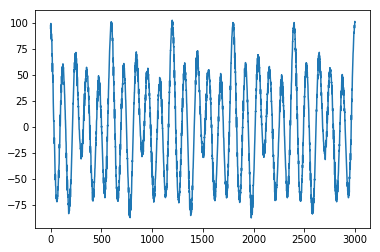

In [8]:
plt.plot(np.arange(N), s2);

In [9]:
va = 0.42 - 0.5 * np.cos(2 * np.pi * np.arange(len(s2))/N) + \
     0.08*np.cos(4 * np.pi * np.arange(len(s2)) / N)
vb = 0.54 - 0.46 * np.cos(2 * np.pi * np.arange(len(s2))/N)

In [10]:
N=100 #3000, 100

s2 = 5*np.cos(4*np.pi*np.arange(N)) + 5*np.cos(8*np.pi*np.arange(N)) + 5*np.cos(12*np.pi*np.arange(N)) + 5*np.cos(16*np.pi*np.arange(N))

In [11]:
def fourier_transform(s):
    A = np.array([(1 / N) * np.sum(s*np.cos(2*np.pi*0/N))])
    for l in range(1, int(N/2) - 1):
        A = np.append(A, (2 / N) * \
                      np.sum(s * np.cos(2 * np.pi * np.arange(N) * l / N)))
    A = np.append(A, (1 / N) * sum(s * np.cos(np.pi * np.arange(N))))
    B = np.array([])
    for l in range(int(N/2)):
        B = np.append(B, (2 / N) * \
                      np.sum(s * np.sin(2 * np.pi * np.arange(N) * l / N)))
    C = np.sqrt(A**2 + B**2)
    return A, B, C

In [12]:
a = np.array([])
b = np.array([])
c = np.array([])
for i in [1, va, vb]:
    s1 = s2 * i
    A, B, C = fourier_transform(s1)
    a = np.append(a, A)
    b = np.append(b, B)
    c = np.append(c, C)

ValueError: operands could not be broadcast together with shapes (100,) (3000,) 

In [72]:
a = a.reshape(3, -1)
b = b.reshape(3, -1)
c = c.reshape(3, -1)

In [76]:
c[0][:10]

array([  3.76587650e-15,   1.50000000e+01,   3.00000000e+01,
         1.27910028e-15,   1.10926764e-14,   1.09056158e-14,
         4.41638179e-15,   3.74975423e-15,   7.50060234e-15,
         7.72925501e-15])

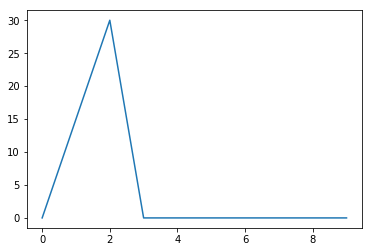

In [73]:
plt.plot(np.arange(len(c[0][:10])), c[0][:10]);

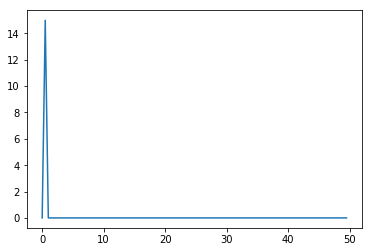

In [29]:
plt.plot(delta_t*np.arange(len(c[0][:100])), b[0][:100]);

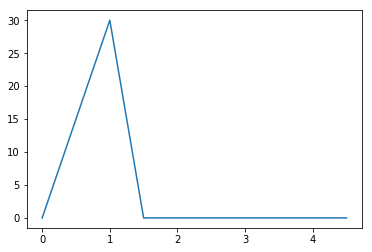

In [32]:
plt.plot(delta_t*np.arange(len(c[0][:10])), c[0][:10]);

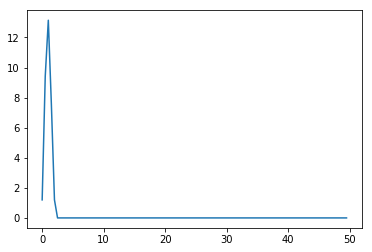

In [17]:
plt.plot(delta_t*np.arange(len(c[1][:100])), c[1][:100]);

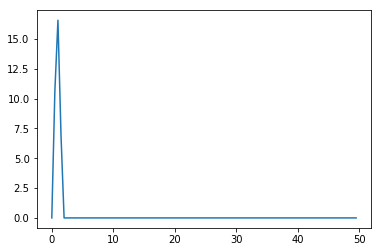

In [18]:
plt.plot(delta_t*np.arange(len(c[2][:100])), c[2][:100]);

In [299]:
def inv(A, B):
    d = []
    for i in range(N):
        d.append(np.sum(A * np.cos(2*np.pi*np.arange(int(N/2))*i/N)) + 
                 np.sum(B * np.sin(2*np.pi*np.arange(int(N/2))*i/N)))
    return d

In [300]:
d = np.array([])
for A, B in zip(a, b):
    d = np.append(d, inv(A, B))
d = d.reshape(3, -1)

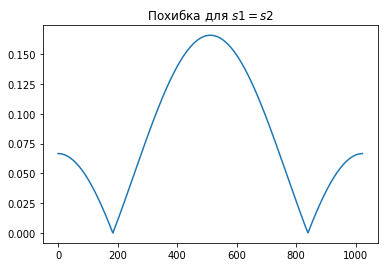

In [301]:
plt.plot(np.arange(len(s2)), abs(1*s2 - d[0]))
plt.title('Похибка для $s1 = s2$');

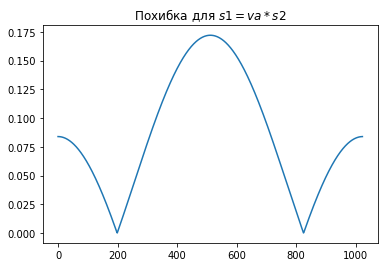

In [302]:
plt.plot(np.arange(len(s2)), abs(va*s2 - d[1]))
plt.title('Похибка для $s1 = va*s2$');

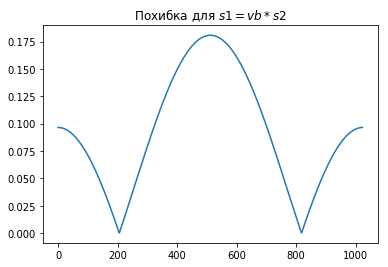

In [303]:
plt.plot(np.arange(len(s2)), abs(vb*s2 - d[2]))
plt.title('Похибка для $s1 = vb*s2$');

In [247]:
np.fft.fft(s2)

array([ 1072.84361275 +0.00000000e+00j,  -159.25092754 -3.54610214e+01j,
         -97.49458352 +1.18902311e+02j, ...,
          -2.11788192 -1.02312524e-01j,   -97.49458352 -1.18902311e+02j,
        -159.25092754 +3.54610214e+01j])